# Linear Regression Classification

## Importing the libraries
Import required Python libraries for data processing, visualization, and machine learning

In [1]:
# Import numerical computing library for arrays and mathematical operations
import numpy as np
# Import matplotlib for creating visualizations and plots
import matplotlib.pyplot as plt
# Import pandas for data manipulation and analysis
import pandas as pd

## Importing the dataset
Load the Social Network Ads CSV file and separate features (X) from target labels (y)

In [2]:
# Read CSV file containing social network ads data
dataset = pd.read_csv('Social_Network_Ads.csv')
# Extract features (X): all columns except the last one (Age and EstimatedSalary)
X = dataset.iloc[:, :-1].values
# Extract target labels (y): only the last column (Purchased or not - 0 or 1)
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set
Divide data into 75% training and 25% testing sets with random_state for reproducibility

In [3]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split
# Split data: 75% for training, 25% for testing; random_state=0 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Display the training features to verify data splitting
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [ ]:
# Display the training labels to verify data splitting
print(y_train)

In [ ]:
# Display the test features
print(X_test)

In [ ]:
# Display the test labels
print(y_test)

## Feature Scaling
Normalize features to have mean 0 and standard deviation 1 using StandardScaler

In [5]:
# Import StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler
# Create scaler object
sc = StandardScaler()
# Fit scaler on training data and transform it (compute mean/std from training data)
X_train = sc.fit_transform(X_train)
# Apply the same scaling transformation to test data
X_test = sc.transform(X_test)

In [ ]:
# Display scaled training features to verify normalization
print(X_train)

In [ ]:
# Display scaled test features to verify normalization
print(X_test)

## Training the Linear Regression model on the Training set
Create and train a Linear Regression model for classification (treating predictions as probabilities)

In [6]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Create linear regression model object
regressor = LinearRegression()
# Train the model on scaled training data
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predicting a new result
Test the trained model on a new data point: age 30 with estimated salary of $87,000

In [7]:
# Make a prediction for a single new sample: age=30, salary=$87,000
# Scale the input using the fitted scaler before prediction
print(regressor.predict(sc.transform([[30, 87000]])))

[0.22077932]


## Predicting the Test set results
Generate predictions for all test samples and compare with actual results

In [8]:
# Predict for all test samples
y_pred = regressor.predict(X_test)
# Round predictions to 0 or 1 for classification (threshold at 0.5)
y_pred_class = np.round(y_pred).astype(int)
# Concatenate predictions and actual results side by side for comparison
print(np.concatenate((y_pred_class.reshape(len(y_pred_class), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix and Evaluating Performance
Evaluate model performance using confusion matrix, accuracy score, and mean squared error

In [9]:
# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
# Create confusion matrix: shows TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_class)
print(cm)
# Calculate accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.4f}")
# Calculate Mean Squared Error (MSE) on continuous predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

[[65  3]
 [ 8 24]]
Accuracy: 0.8900
Mean Squared Error: 0.0987


## Visualising the Training set results
Create a 2D visualization of the linear regression decision boundaries and training data points

/var/folders/tf/2g3nq2w55vl925fr4rnv22m40000gn/T/ipykernel_54173/636627240.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


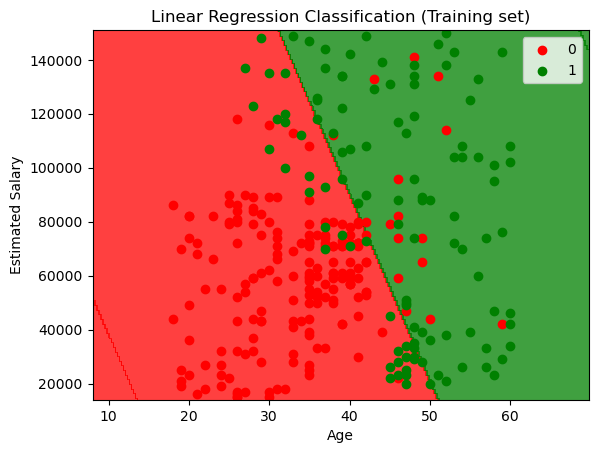

In [10]:
# Import color mapping for visualization
from matplotlib.colors import ListedColormap
# Inverse transform training data to original scale for plotting
X_set, y_set = sc.inverse_transform(X_train), y_train
# Create mesh grid for decision boundary plot
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# Create contour plot showing decision boundaries (round predictions to 0 or 1)
predictions = np.round(regressor.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).astype(int)
plt.contourf(X1, X2, predictions.reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# Set axis limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plot actual training data points colored by class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# Add labels and title
plt.title('Linear Regression Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results
Create a 2D visualization of the linear regression decision boundaries and test data points

In [ ]:
# Inverse transform test data to original scale
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create mesh grid for test set visualization
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# Create contour plot for test set
predictions = np.round(regressor.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).astype(int)
plt.contourf(X1, X2, predictions.reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# Set axis limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plot test data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# Add labels and title
plt.title('Linear Regression Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Saving the Model and Scaler as Pickle Files
Save the trained linear regression model and scaler for future use without retraining

In [ ]:
# Import pickle library for serializing Python objects
import pickle

# Save the trained linear regression model to a pickle file
with open('linear_regression_classifier.pkl', 'wb') as f:
    pickle.dump(regressor, f)
print("Linear Regression model saved as 'linear_regression_classifier.pkl'")

# Save the scaler object to a pickle file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
print("Scaler saved as 'scaler.pkl'")

# Display confirmation message
print("\nBoth model and scaler have been successfully saved!")
print("You can now load these files using pickle.load() for predictions without retraining.")